# <center><font color="green"> https://bit.ly/ptpjb-2021-06</font><br><font color="blue">06 - Advanced Clustering Analysis</font></center>

<center><img alt="" src="images/cover_ptpjb_2021.png"/></center> 

## <center><font color="blue">tau-data Indonesia</font><br>(C) Taufik Sutanto - 2021</center>
<center><a href="https://tau-data.id">https://tau-data.id</a> ~ <a href="mailto:taufik@tau-data.id">taufik@tau-data.id</a></center>

# <center><font color="blue"> Outline - Advanced Clustering Analysis</font></center>

* Review Singkat Pendahuluan Clustering ANalysis
* k-Medoid
* Hierarchical CLustering
* DBSCAN for multivariate Outlier Detection
* Isolation Forest for Anomaly Detection
* Closing Remark Clustering

<img alt="" src="images/meme-cartoon/meme one does not learn clustering in one day.jpg" style="height: 200px;"/>

# <center><font color="blue">Review singkat Clustering Analysis</font></center>

<img src="images/clustering_research_mindmap_taudataID.png" style="height: 400px" />

In [ ]:
!mkdir data
!pip install scikit-learn-extra

In [66]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.metrics.pairwise import euclidean_distances
from sklearn_extra.cluster import KMedoids
from sklearn.ensemble import IsolationForest

sns.set(style="ticks", color_codes=True)
random_state = 99

# <center><font color="blue">Load data dari module (hasil clustering) sebelumnya</font></center>

<img src="images/meme-cartoon/meme stay healthy and continue.jpg" style="height: 400px" />

In [12]:
# Loading the clustering Data from the previous module
file_ = 'data/df_Module-05.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/{file_}
    df = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
C = df['species']#.values
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,k-means,k-means++,mini-k-means,mini-k-means++
0,5.1,3.5,1.4,0.2,setosa,0,1,1,1
1,4.9,3.0,1.4,0.2,setosa,0,1,1,1
2,4.7,3.2,1.3,0.2,setosa,0,1,1,1
3,4.6,3.1,1.5,0.2,setosa,0,1,1,1
4,5.0,3.6,1.4,0.2,setosa,0,1,1,1


# Kelemahan Kedua: Hasil yang tidak <font color="blue">Robust

## Studi Kasus <font color="blue">K-Medoid

* Pentingnya memahami "konsep" statistika/matematika dasar.

<img src='images/kmeans-vs-kmedoids.png'  style="height: 300px"/>

* Sumber Gambar: https://www.researchgate.net/figure/The-graphical-representation-of-the-difference-between-the-k-means-and-k-medoids_fig1_342871651

# Fenomena terkenal di " <font color="blue">How to Lie with Statistics "

<img src='images/mean_vs_median.png' style="height: 300px"/>

* Average menurut kamus Oxford: https://www.lexico.com/en/definition/average

## Dari Mean ke Median (Medoid)

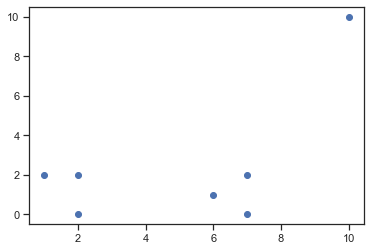

In [6]:
# Toy-data ==> ini perlu di riset
A = np.array([[2, 0], [1, 2], [2, 2], [7, 2], [6, 1], [7, 0], [10,10]])
fig, ax = plt.subplots()
ax.scatter(A[:,0], A[:,1])
plt.show()

In [8]:
# Solusi k-Means
km = cluster.KMeans(n_clusters=2, init='k-means++').fit(A)
C_km = km.predict(A)
centroid_km = km.cluster_centers_

# Solusi k-Medoid: https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
kmedoids = KMedoids(n_clusters=2).fit(A)
C_med = kmedoids.predict(A)
centroid_med = kmedoids.cluster_centers_
"Done"

'Done'

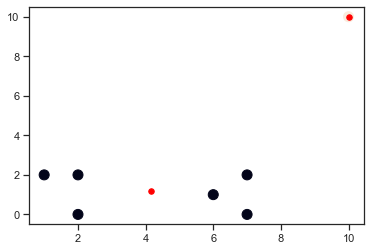

array([0, 0, 0, 0, 0, 0, 1])

In [10]:
# Plot Solusi k-Means
fig, ax = plt.subplots()
ax.scatter(A[:,0], A[:,1], c=C_km, s=100) # s= size
ax.scatter(centroid_km[:,0], centroid_km[:,1], c="red", s=30) # Centroid k-Means "Red"
plt.show()
C_km

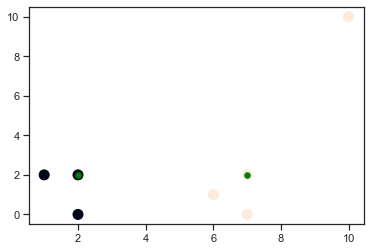

In [11]:
# Plot Solusi k-Medoid
fig, ax = plt.subplots()
ax.scatter(A[:,0], A[:,1], c=C_med, s=100)
ax.scatter(centroid_med[:,0], centroid_med[:,1], c="green", s=30) # Centroid k-Medoid "Green"
plt.show() 
# Di Contoh ini terlihat pentingnya Outlier detection!

# <font color="blue">Diskusi</font>: Apakah berarti k-Medoid lebih baik dari k-Means?

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

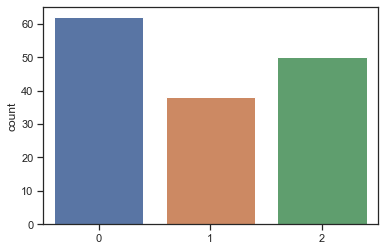

In [13]:
kmedoids = KMedoids(n_clusters=3).fit(X)
C_medoid = kmedoids.predict(X)
sns.countplot(C_medoid)
C_medoid[:10]

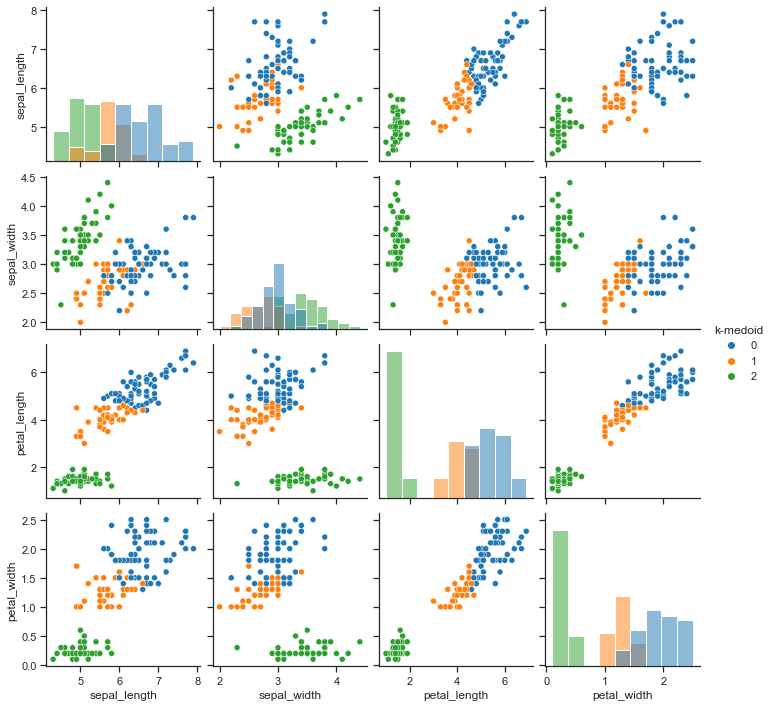

In [15]:
df['k-medoid'] = C_medoid
# Saving the Clustering results for future use/analysis
df.to_csv("data/df_Module-06.csv", encoding='utf8', index=False)
# Plot the clustering result
g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','k-medoid']], \
                 hue="k-medoid", diag_kind="hist", palette="tab10")

# <center><font color="blue">Hierarchical Clustering (Agglomerative)</font></center>

<img alt="" src="images/5_hierarchical.gif" style="height: 300px"/>

* image source: https://www.kdnuggets.com/2019/09/hierarchical-clustering.html
* Clustering Optimal = Garis terpanjang https://www.sciencedirect.com/topics/computer-science/agglomerative-algorithm

# <center><font color="blue">Hierarchical Clustering Linkages</font></center>

<img alt="" src="images/5_linkages.png" style="height: 400px"/>

# <center><font color="blue">Hierarchical Clustering Applications</font></center>

<img alt="" src="images/5_Hierarchical_Text_Clustering_in_Genes_penyakit.jpg" style="height: 400px"/>

image Source: https://www.sciencedirect.com/science/article/pii/S1532046416000307

# <center><font color="blue">Hierarchical Clustering Linkages Effects</font></center>

<img alt="" src="images/hierarchical clustering linkages.png" style="height: 400px"/>

* single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.
* average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.
* Ward is the most effective method for noisy data.
* http://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

# <center><font color="blue">Hierarchical Clustering: Agglomerative vs Divisive</font></center>

<img alt="" src="images/hierarchical-clustering-agnes-diana.png"  style="height: 300px"/>

image source: https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/

# <center><font color="blue">Hierarchical Clustering: Pro-Contra Penggunaan</font></center>

## <font color="green">Pro</font>
* No assumption of a particular number of clusters (i.e. k-means)
* May correspond to meaningful taxonomies

## <font color="green">Cons</font>
* Once a decision is made to combine two clusters, it can’t be undone
* Too slow for large data sets, O(𝑛2 log(𝑛))

# <center><font color="blue">Evaluasi Hierarchical Clustering?</font></center>

* Silhoutte Coefficient, Dunn index, or Davies–Bouldin index
* Domain knowledge - interpretability
* External Evaluation

Read more here: https://www.ims.uni-stuttgart.de/document/team/schulte/theses/phd/algorithm.pdf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

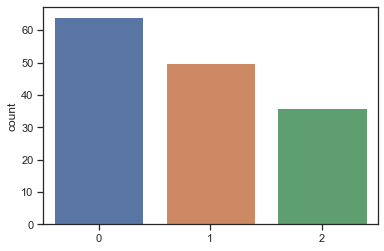

In [16]:
# Hierarchical http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='average', affinity = 'euclidean')
hierarchical.fit(X) # Lambat .... dan menggunakan banyak memori O(N^2 log(N))
C_h = hierarchical.labels_.astype(np.int)

sns.countplot(C_h)
C_h[:10]

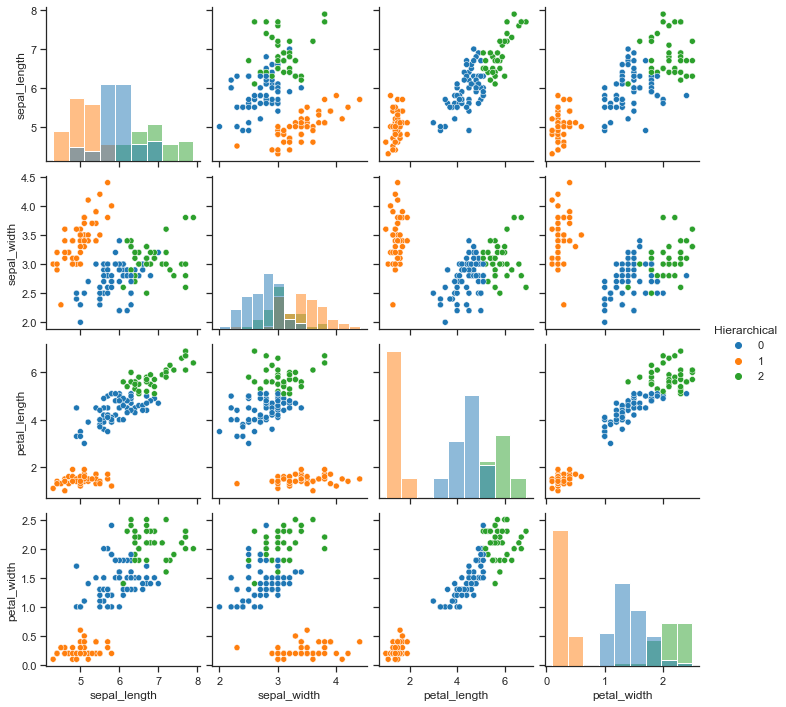

In [17]:
df['Hierarchical'] = C_h
# Saving the Clustering results for future use/analysis
df.to_csv("data/df_Module-06.csv", encoding='utf8', index=False)
# Plot the clustering result
g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','Hierarchical']], \
                 hue="Hierarchical", diag_kind="hist", palette="tab10")

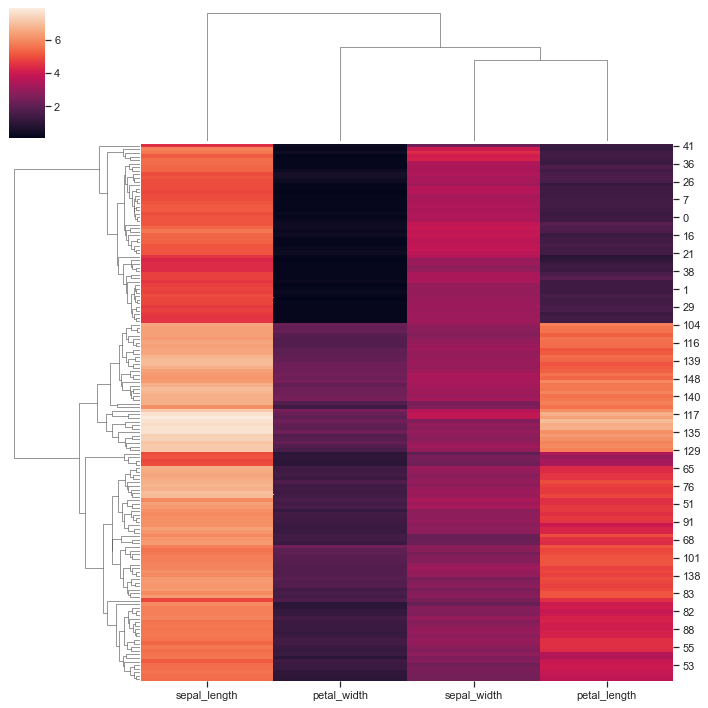

In [19]:
# Dendogram Example
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
g = sns.clustermap(X, method="average", metric="euclidean")

In [67]:
# Ilustrasi Jika Data tidak terlalu banyak
N = 30 # sampel 30 record
S = X.sample(N)
Nama = ["Bunga-"+str(i) for i in range(N)]
M = euclidean_distances(S, S)
print(S.shape, M.shape)
S.head()

(30, 4) (30, 30)


,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
140,6.7,3.1,5.6,2.4
45,4.8,3.0,1.4,0.3
89,5.5,2.5,4.0,1.3
122,7.7,2.8,6.7,2.0


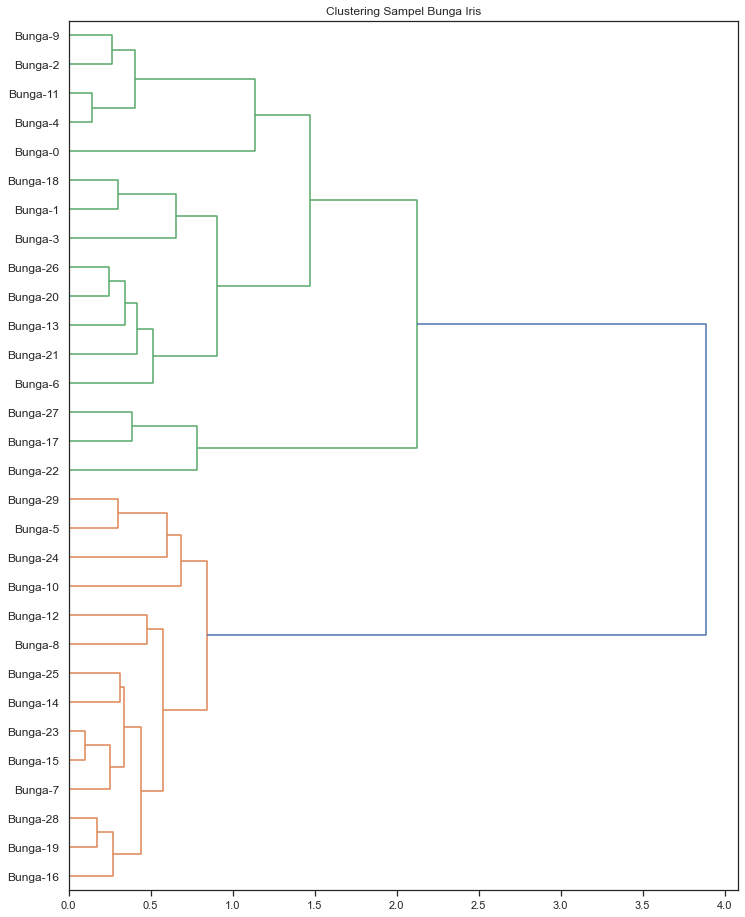

In [64]:
plt.figure(figsize=(12, 16))
dists = squareform(M)
Z = linkage(dists, "average")
dendrogram(Z, labels=Nama, leaf_font_size=12, orientation='right')
plt.title("Clustering Sampel Bunga Iris")
plt.show()

# <center><font color="blue">DBSCAN for Multivariate Outlier Detection</font></center>

<img alt="" src="images/5_DBSCAN.gif"  style="height: 400px"/>

* Karena algoritma (cara kerjanya) ini maka DBSCAN sering digunakan untuk (multivariate) outlier detection.

<img alt="" src="images/IV_DBSCAN.gif"  style="height: 400px"/>

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

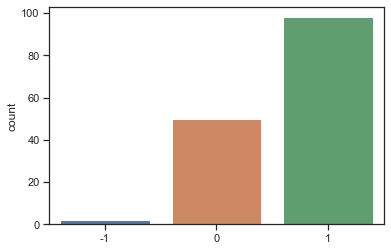

In [20]:
# DBSCAN http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
# tidak membutuhkan input parameter k!!!... sangat bermanfaat untuk clustering data yang besar
dbscan = cluster.DBSCAN(eps=0.8, min_samples=5, metric='euclidean')
dbscan.fit(X)
C_db = dbscan.labels_.astype(np.int)
sns.countplot(C_db)
C_db[:10]
# apa makna cluster label -1?

In [21]:
# Banyaknya outlier terdeteksi
sum([1 for i in C_db if i==-1])

2

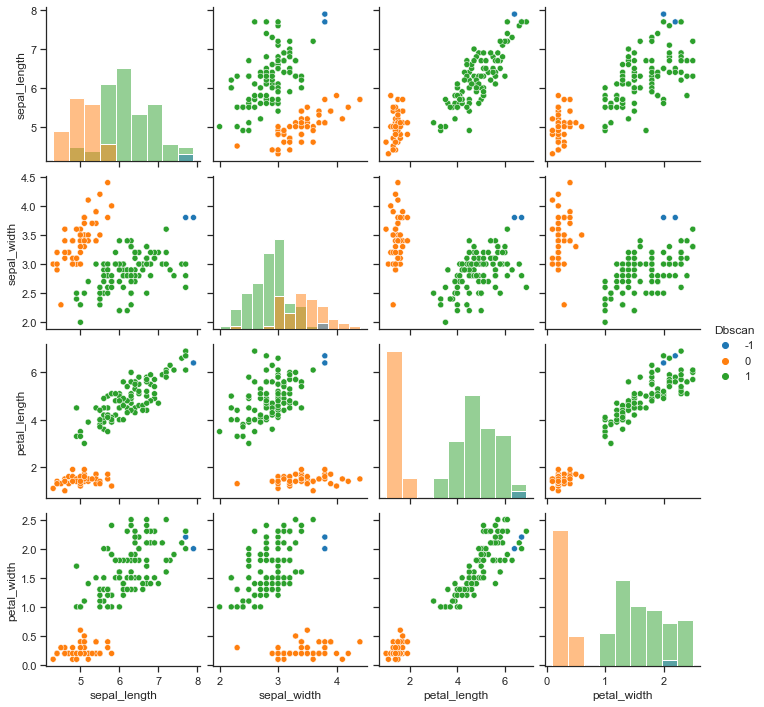

In [22]:
df['Dbscan'] = C_db
# Saving the Clustering results for future use/analysis
df.to_csv("data/df_Module-06.csv", encoding='utf8', index=False)
# Plot the clustering result
g = sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','Dbscan']], \
                 hue="Dbscan", diag_kind="hist", palette="tab10")

# <center><font color="blue">Evaluasi DBSCAN?</font></center>

* Application-based ==> Outlier Detection
* internal validation indice called DBCV by Moulavi et al. Paper is available here: https://epubs.siam.org/doi/pdf/10.1137/1.9781611973440.96 
* Python package: https://github.com/christopherjenness/DBCV

<img alt="" src="images/dbcv.png" />

# <center><font color="blue">Review Clustering</font></center>

<img alt="" src="images/5_clustering_benchmarks.png" style="height:400px" />

# <center><font color="blue">Clustering General Guideline</font></center>

<img alt="" src="images/5_Cluster_yg_mana.png" style="height:400px; width:694px" />

# <center><font color="blue">Representasi Cluster</font></center>

<img src='images/Representasi_Cluster.PNG'  style="height: 400px"/>
* Sutanto, Taufik., & Nayak, R. (2018). Fine-grained document clustering via ranking and its application to social media analytics. Social Network Analysis and Mining, 8(1), 1-19.

# <center><font color="blue">Catatan Clustering untuk Insight di Big Data</font></center>

<img src='images/fcar.png'  style="height: 400px"/>

# <center><font color="blue"> Studi Kasus (Latihan): Penggunaan Energi Gedung</font></center>

<img alt="" src="images/Ashrae-Energy-Prediction.jpg" style="height: 200px;" />

<font color="green"> Deskripsi</font>

* Studi Kasus kali ini berasal dari Permasalahan Prediksi Penggunaan Energi Gedung dari PT Ashrae - American Society of Heating, Refrigerating and Air-Conditioning Engineers https://www.ashrae.org/about
* Sebagai latihan studi kasus EDA kita hanya akan menggunakan sebagian dari data yang ada.
* Data lengkap dan keterangan: https://www.kaggle.com/c/ashrae-energy-prediction/data
* Data berupa 3 buah file CSV: Informasi Tentang Gedung, Penggunaan Energi Gedung, dan Cuaca.
* Permasalahan utama dari kasus ini sebenarnya adalah forecasting/peramalan penggunaan energi. Akan tetapi di module 03 dan 04 ini kita hanya akan melakukan EDA pada data yang ada.
* Hasil EDA ini kelak akan kita gunakan untuk melakukan analisis lebih lanjut.

<font color="green"> Metadata</font>

* Variabel di Data Gedung "**gd**":
    - site_id & building_id: id lokasi dan gedung
    - primary_use: Peruntukan Gedung
    - square_feet: Luas bangunan gedung
    - year_built: Tahun pembuatan gedung
    - floor_count: Banyaknya lantai yang ada di gedung.
* Variabel di Data Energy Gedung "**en**" (selain building_id):
    - meter	: Jenis meter reading penggunaan energy gedung.
    - timestamp	: Waktu saat pengukuran (per-jam)
    - meter_reading: Penggunaan energy.
* Variabel di Data Cuaca "**cu**" (selain site_id & timestamp):
    - air_temperature: suhu udara
    - cloud_coverage: ukuran berawan	
    - dew_temperature: suhu dew (menbun?)
    - precip_depth_1_hr: precipitation (banyaknya air dari langit, karena sebab apapun)
    - sea_level_pressure: Tekanan permukaan laut.	
    - wind_direction & wind_speed: arah dan kecepatan angin

# <center><font color="blue"> Task</font></center>

* **Task** pada studi kasus ini **berbeda** dengan sebelumnya, yaitu:
 - Lakukan pengelompokkan berdasarkan objek id_ gedung, sehingga kita mendapatkan ada "k" tipe penggunaan energy. \
 - Pemilihan algoritma clustering-nya adalah bagian dari latihan ini.
 - Lakukan outlier detection menggunakan variabel penggunaan energi dan cuaca untuk mendapatkan penggunaan energi oleh suatu gedung yang berbeda dari kebanyakan gedung lainnya.
* Petunjuk pengerjaan:
 - Lakukan aggregate data terlebih dahulu. Bentuk tabelnya sehingga kita memiliki tabel dengan informasi di setiap baris memuat id_ gedung, penggunaan energi (rata-rata), dan kolom-kolom di tabel cuaca (rata-rata).

In [77]:
file_00 = 'data/ashrae-energy_building_metadata.csv'
file_01 = 'data/ashrae-energy_train_sample.csv'
file_02 = 'data/ashrae-energy_weather_test.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    gd = pd.read_csv(file_00, error_bad_lines=False, low_memory = False, encoding='utf8') #gedung
    en = pd.read_csv(file_01, error_bad_lines=False, low_memory = False, encoding='utf8') #energy
    cu = pd.read_csv(file_02, error_bad_lines=False, low_memory = False, encoding='utf8') #cuaca
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/data/ashrae-energy_building_metadata.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/data/ashrae-energy_train_sample.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/data/ashrae-energy_weather_test.csv
    gd = pd.read_csv(file_00, error_bad_lines=False, low_memory = False, encoding='utf8') #gedung
    en = pd.read_csv(file_01, error_bad_lines=False, low_memory = False, encoding='utf8') #energy
    cu = pd.read_csv(file_02, error_bad_lines=False, low_memory = False, encoding='utf8') #cuaca

print("Ukuran Data Gedung={}, Data Train={}, Data Weather={}".format(gd.shape, en.shape, cu.shape))
gd.head()

Ukuran Data Gedung=(1449, 6), Data Train=(500000, 4), Data Weather=(277243, 9)


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [78]:
cu.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [79]:
en.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
# jawaban diberikan mulai dari cell ini, silahkan buat cell baru sesuai kebutuhan (alt+Enter)



# <center><font color="blue"> Akhir Modul 06 - Advanced Clustering Analysis</font></center>

<hr />
<img alt="" src="images/meme-cartoon/meme clustering.jpg" style="height: 300px;"/>